In [1]:
import pandas as pd
import numpy as np

In [2]:
path = (r"C:\Users\Sourya\Desktop\Ml - Projects\Car - Price Prediction\CAR DETAILS FROM CAR DEKHO.csv")
##
'''Kaggle vehicle data set
https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv
'''

'Kaggle vehicle data set\nhttps://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv\n'

In [3]:
df=pd.read_csv(path)

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
df.shape

(4340, 8)

In [6]:
##check missing values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
print(df['seller_type'].unique())
print(df['fuel'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [8]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [9]:
final_dataset=df[['year','selling_price','km_driven','fuel','seller_type','transmission','owner']]

In [10]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [11]:
final_dataset['current year']=2021

In [12]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2021
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2021
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2021
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2021
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2021


In [13]:
final_dataset['no_year']=final_dataset['current year']- final_dataset['year']

In [14]:
df1 = final_dataset
df1.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current year,no_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2021,14
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2021,14
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2021,9
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2021,4
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2021,7


In [15]:
df1.drop(['year'],axis=1,inplace=True)

In [16]:
df1.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,current year,no_year
0,60000,70000,Petrol,Individual,Manual,First Owner,2021,14
1,135000,50000,Petrol,Individual,Manual,First Owner,2021,14
2,600000,100000,Diesel,Individual,Manual,First Owner,2021,9
3,250000,46000,Petrol,Individual,Manual,First Owner,2021,4
4,450000,141000,Diesel,Individual,Manual,Second Owner,2021,7


In [17]:
df1 = pd.get_dummies(df1,drop_first=False)

In [18]:
df1.head()

,selling_price,km_driven,current year,no_year,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,2021,14,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,135000,50000,2021,14,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
2,600000,100000,2021,9,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
3,250000,46000,2021,4,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,450000,141000,2021,7,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


In [19]:
import collections

In [20]:
from collections import Counter


In [21]:
Counter(df1['fuel_Diesel'])

Counter({0: 2187, 1: 2153})

In [22]:
#fuel type count
for column in df1.columns[4:9]:
    print(Counter(df1[column]))

Counter({0: 4300, 1: 40})
Counter({0: 2187, 1: 2153})
Counter({0: 4339, 1: 1})
Counter({0: 4317, 1: 23})
Counter({0: 2217, 1: 2123})


In [23]:
df1=df1.drop(['current year'],axis=1)

In [24]:
df1.head()
df1.shape

(4340, 18)

In [25]:
for column in df1.iloc[:,13:]:
    print(Counter(df1[column]))

Counter({1: 2832, 0: 1508})
Counter({0: 4259, 1: 81})
Counter({0: 3234, 1: 1106})
Counter({0: 4323, 1: 17})
Counter({0: 4036, 1: 304})


In [26]:
df1.corr()

,selling_price,km_driven,no_year,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,-0.413922,-0.037839,0.282947,-0.005095,-0.042434,-0.269453,0.205111,-0.236798,0.110176,0.530205,-0.530205,0.223889,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.002107,0.285396,-0.001372,0.036652,-0.291139,-0.156465,0.182663,-0.089858,-0.120226,0.120226,-0.299731,0.097349,0.195203,-0.083445,0.194713
no_year,-0.413922,0.419688,1.000000,-0.008792,-0.121424,0.025540,0.051266,0.114908,-0.143464,0.173703,-0.100225,-0.143800,0.143800,-0.438897,0.186361,0.292349,-0.095795,0.244308
fuel_CNG,-0.037839,0.002107,-0.008792,1.000000,-0.095696,-0.001464,-0.007040,-0.094382,-0.000926,0.006112,-0.014963,-0.032723,0.032723,-0.025832,0.040149,0.021062,-0.006048,-0.007575
fuel_Diesel,0.282947,0.285396,-0.121424,-0.095696,1.000000,-0.015063,-0.072422,-0.970934,0.039364,-0.035314,-0.007911,0.048098,-0.048098,-0.000878,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.001464,-0.015063,1.000000,-0.001108,-0.014856,0.027853,-0.026118,-0.002355,0.044746,-0.044746,-0.020804,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.007040,-0.072422,-0.001108,1.000000,-0.071427,-0.032231,0.035122,-0.011324,-0.024764,0.024764,-0.033379,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.094382,-0.970934,-0.014856,-0.071427,1.000000,-0.035360,0.029845,0.012489,-0.039614,0.039614,0.011296,0.011502,-0.012717,0.012427,-0.008502
seller_type_Dealer,0.205111,-0.156465,-0.143464,-0.000926,0.039364,0.027853,-0.032231,-0.035360,1.000000,-0.937703,-0.084557,0.206163,-0.206163,0.224992,-0.067062,-0.165228,0.115054,-0.130250
seller_type_Individual,-0.236798,0.182663,0.173703,0.006112,-0.035314,-0.026118,0.035122,0.029845,-0.937703,1.000000,-0.266904,-0.214163,0.214163,-0.252628,0.072322,0.186573,-0.107886,0.140823


In [27]:
import seaborn as sns

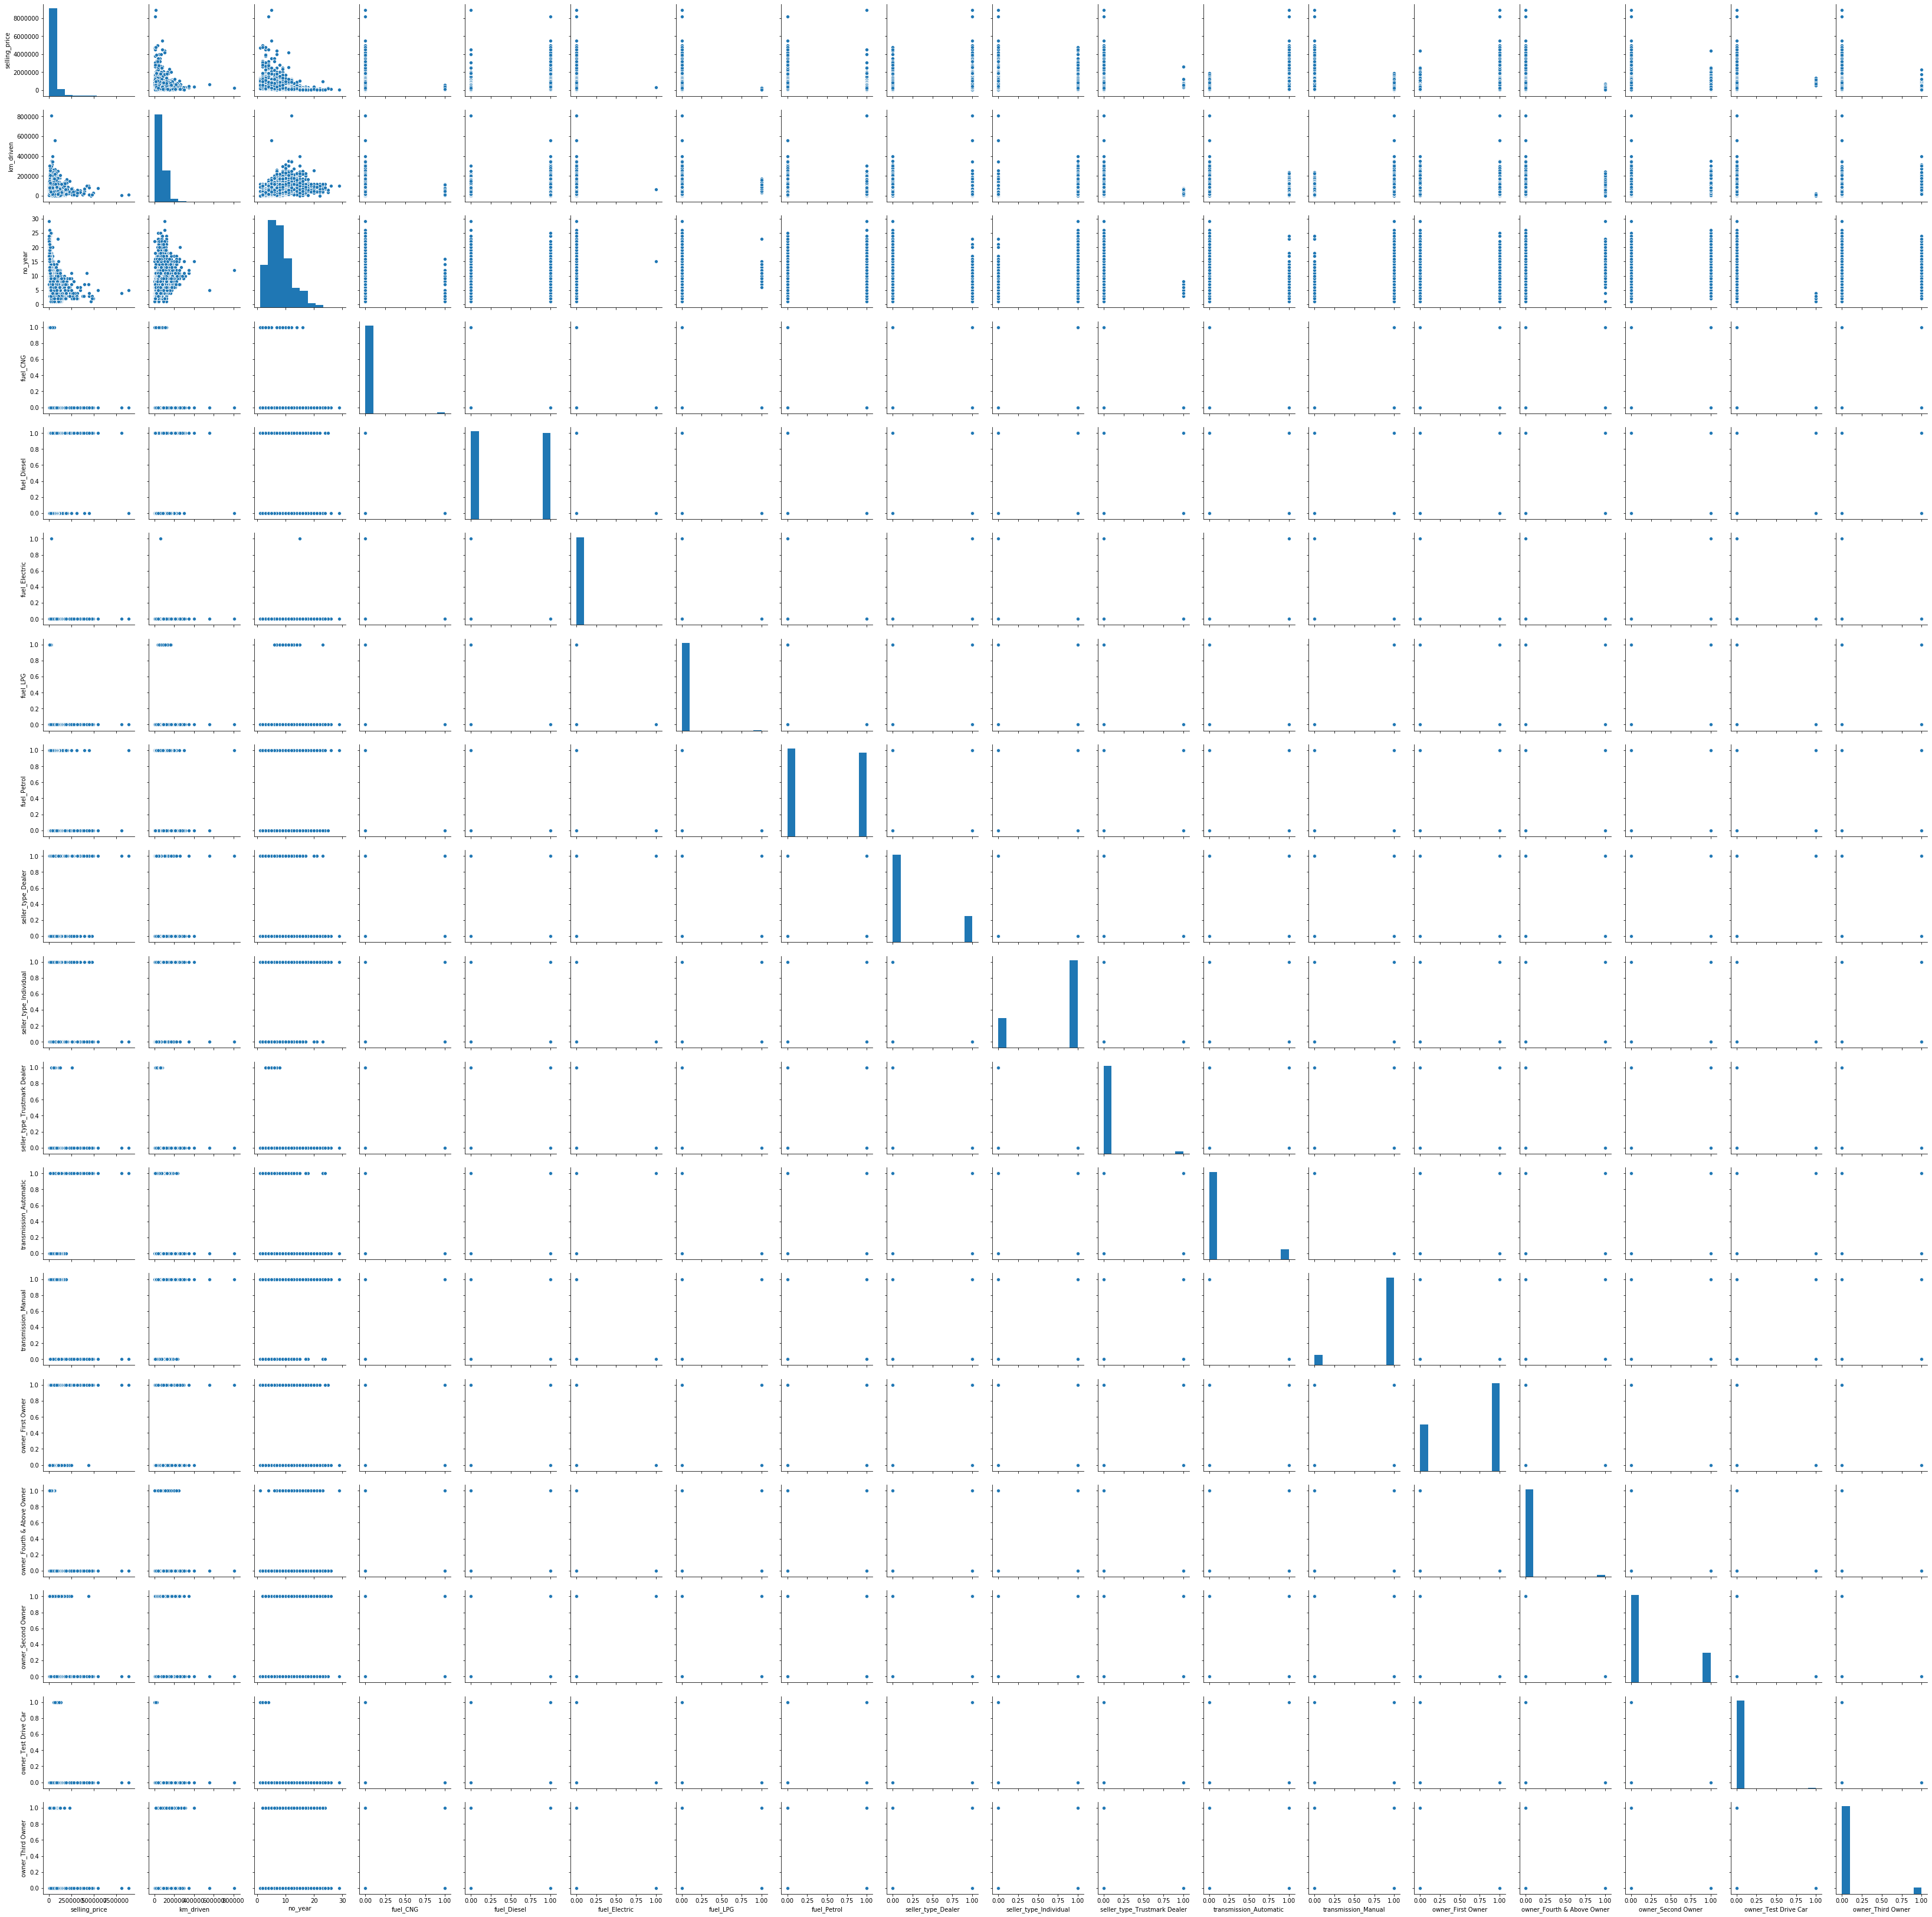

In [28]:
sns.pairplot(df1)

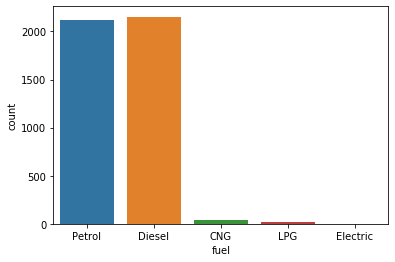

In [29]:
sns.countplot(x=df["fuel"])

In [62]:
df1=df1.drop(['fuel_CNG','fuel_LPG',],axis=1)

In [63]:
import matplotlib.pyplot as plt

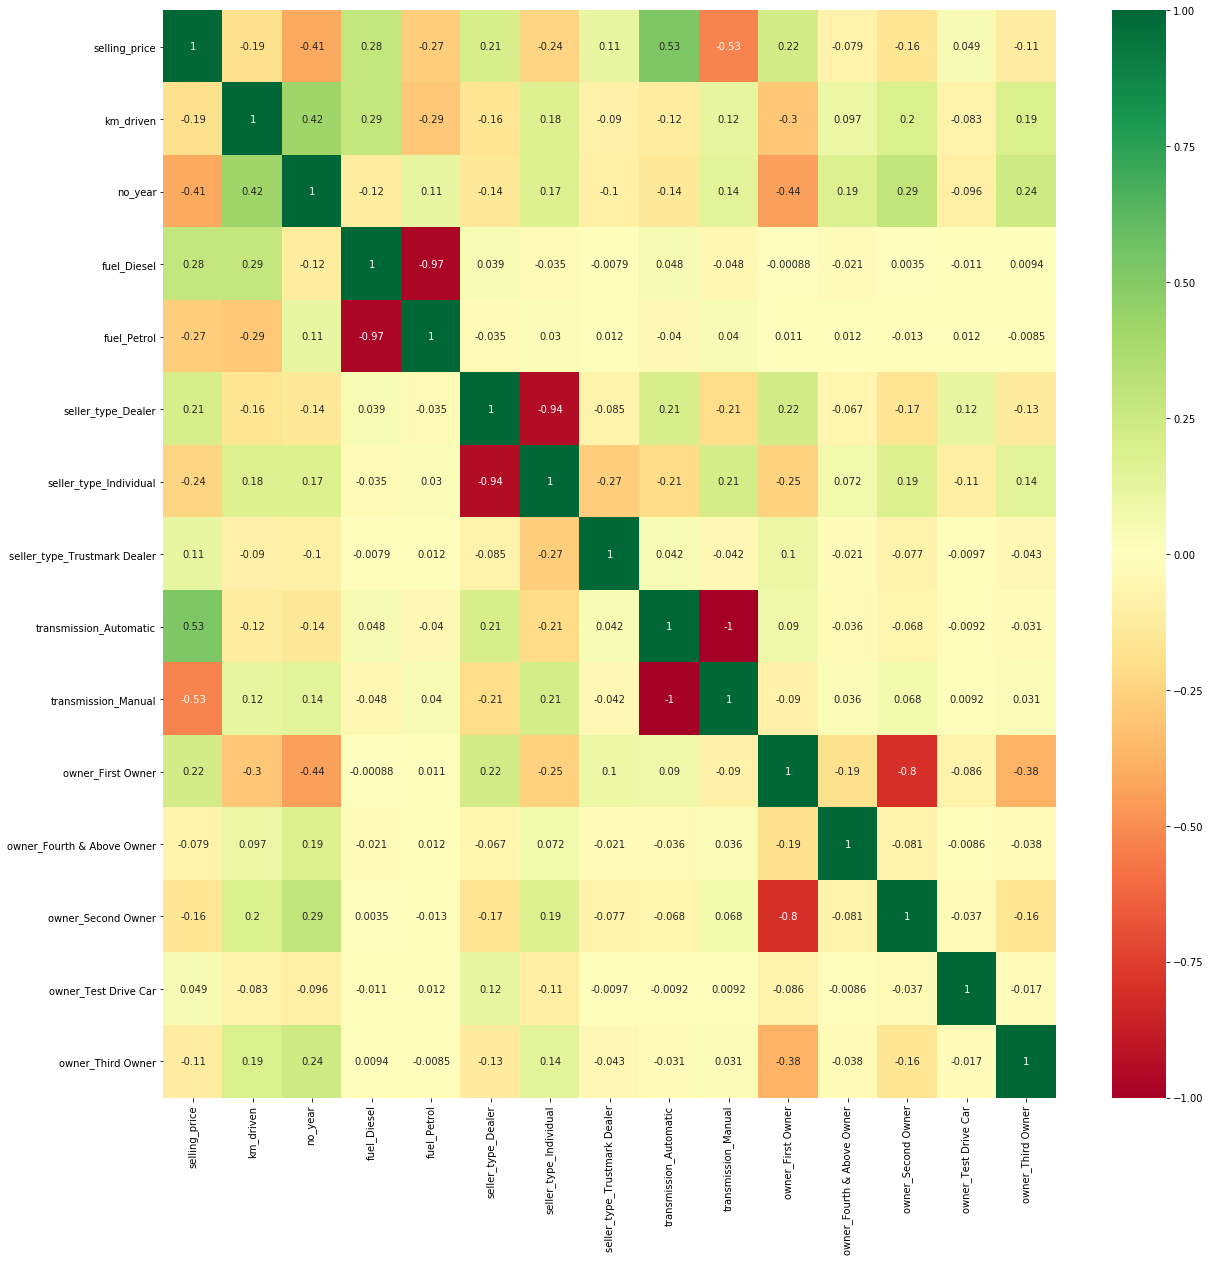

In [64]:
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [65]:
X=df1.iloc[:,1:]
y=df1.iloc[:,0]

In [66]:
X.head()

,km_driven,no_year,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,14,0,1,0,1,0,0,1,1,0,0,0,0
1,50000,14,0,1,0,1,0,0,1,1,0,0,0,0
2,100000,9,1,0,0,1,0,0,1,1,0,0,0,0
3,46000,4,0,1,0,1,0,0,1,1,0,0,0,0
4,141000,7,1,0,0,1,0,0,1,0,0,1,0,0


In [34]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [35]:
df1=df1.drop(['fuel_Electric'],axis=1)

In [36]:
df1.shape

(4340, 17)

In [37]:
X=df1.iloc[:,1:]
y=df1.iloc[:,0]

In [38]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [39]:
print(model.feature_importances_)

[2.43780753e-01 2.38278762e-01 7.50211786e-05 1.30106190e-01
 2.03720483e-05 1.76022500e-04 3.06426825e-02 1.78416108e-02
 6.15246262e-03 1.46414305e-01 1.46417586e-01 2.69242278e-02
 3.95221563e-04 8.82971892e-03 2.03352921e-03 1.91153496e-03]


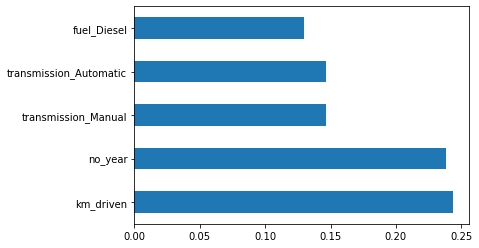

In [40]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

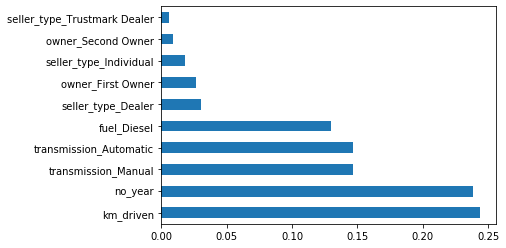

In [41]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [42]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
regressor=RandomForestRegressor()

In [45]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [48]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [49]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [50]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [51]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [52]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [53]:
rf_random.best_score_

-112689343152.28201

In [54]:
predictions=rf_random.predict(X_test)

In [55]:
predictions

array([204419.37993046, 535296.96390594, 146454.46891852, ...,
       292001.00151564, 883970.15614452, 169939.7611773 ])

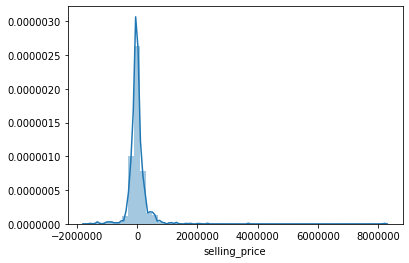

In [56]:

sns.distplot(y_test-predictions)

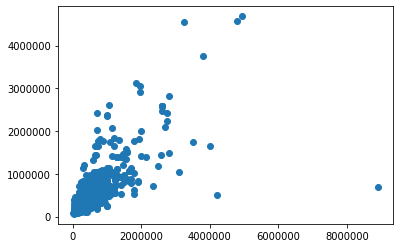

In [57]:
plt.scatter(y_test,predictions)

In [58]:
from sklearn import metrics

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 168751.60531882144
MSE: 137661557944.45038
RMSE: 371027.70509013254


In [60]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)